In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [24]:
a=pd.read_csv('/content/IRIS Flower.csv')
print(a)

     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [9]:
print(a.head())
print(a.shape)

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
(150, 5)


In [10]:
label_encoder = LabelEncoder()
a['species'] = label_encoder.fit_transform(a['species'])
X = a[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = a['species']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

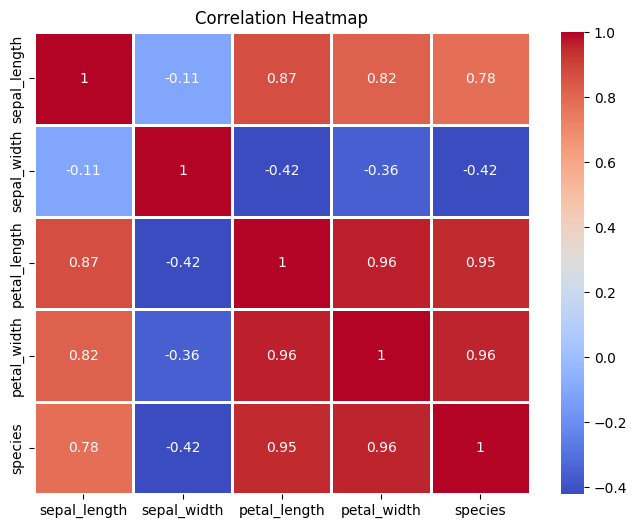

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(a.corr(), annot=True, cmap='coolwarm', linewidths=1)
plt.title('Correlation Heatmap')
plt.show()

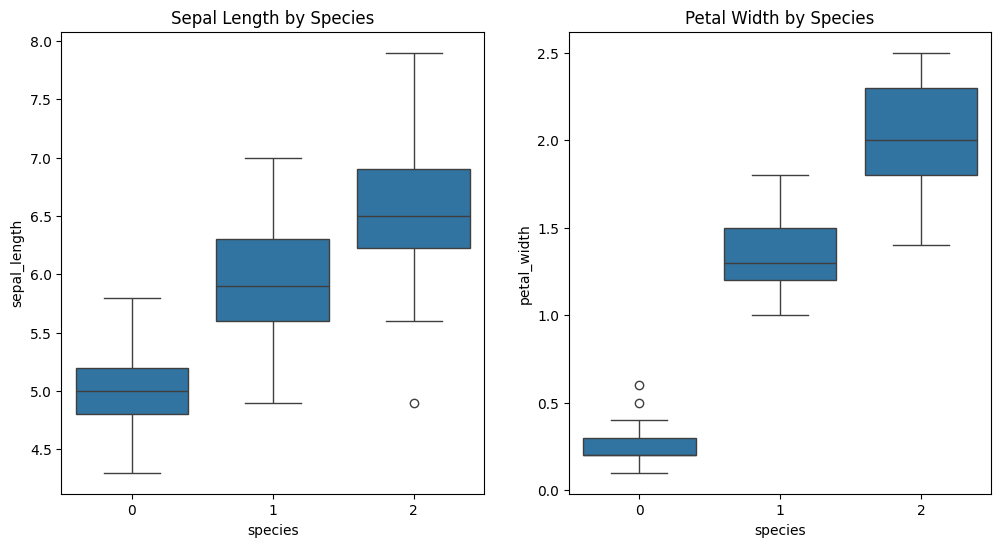

In [13]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='species', y='sepal_length', data=a)
plt.title('Sepal Length by Species')
plt.subplot(1, 2, 2)
sns.boxplot(x='species', y='petal_width', data=a)
plt.title('Petal Width by Species')
plt.show()

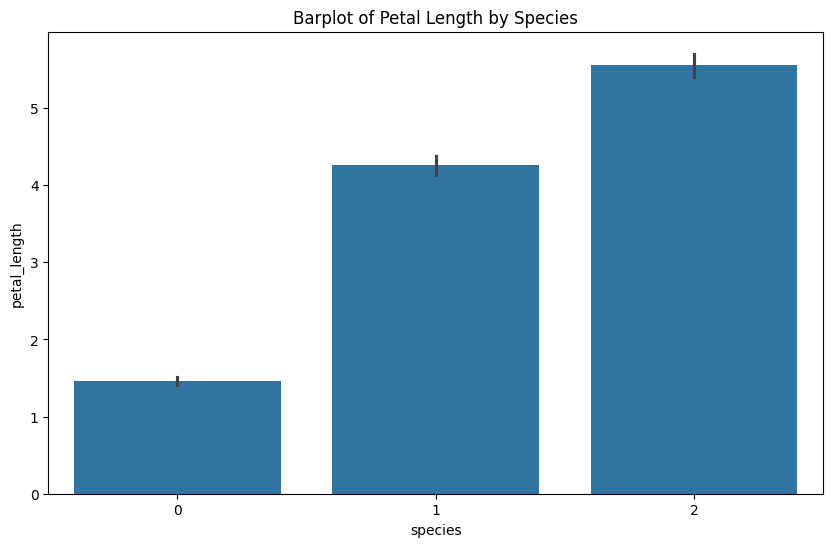

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x='species', y='petal_length', data=a)
plt.title('Barplot of Petal Length by Species')
plt.show()

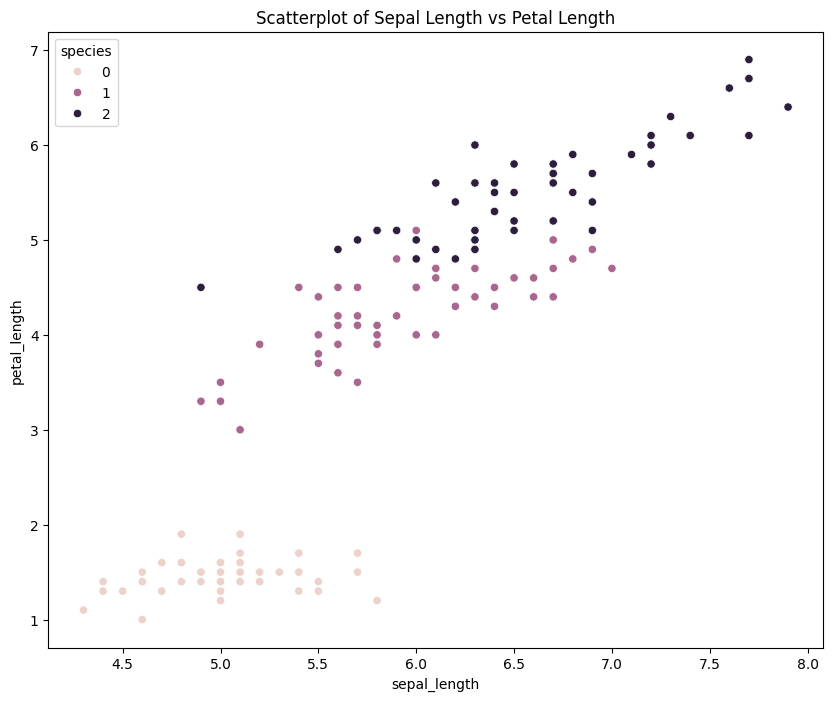

In [15]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=a)
plt.title('Scatterplot of Sepal Length vs Petal Length')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (2) th

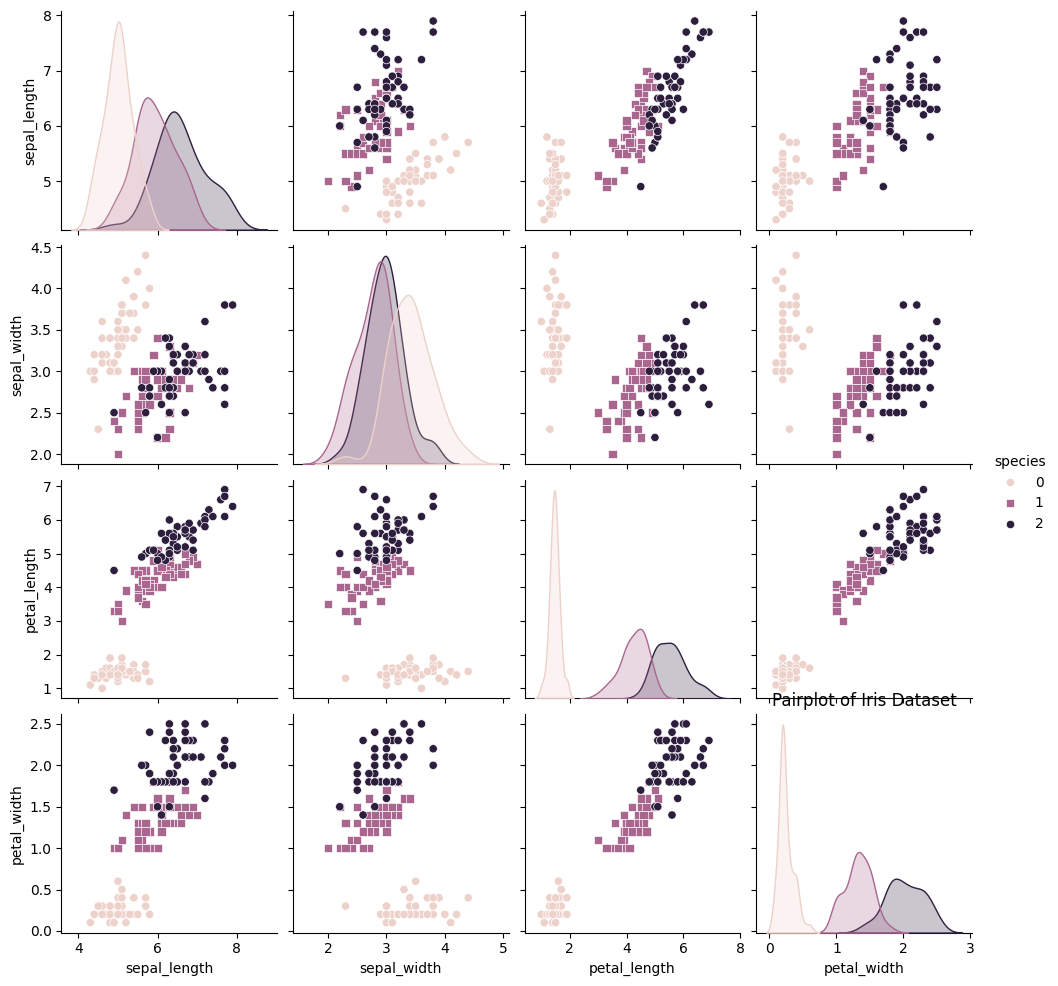

In [16]:
sns.pairplot(a, hue='species', markers=['o', 's'])
plt.title('Pairplot of Iris Dataset')
plt.show()

In [17]:
print('Model 1: Logistic Regression')
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
prediction_lr = model_lr.predict(X_test)
print('Accuracy (Logistic Regression):', accuracy_score(y_test, prediction_lr))
print(classification_report(y_test, prediction_lr))

Model 1: Logistic Regression
Accuracy (Logistic Regression): 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        11

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [18]:
print('Model 2: Support Vector Machine (SVM)')
model_svm = SVC()
model_svm.fit(X_train, y_train)
prediction_svm = model_svm.predict(X_test)
print('Accuracy (SVM):', accuracy_score(y_test, prediction_svm))
print('Confusion Matrix (SVM):\n', confusion_matrix(y_test, prediction_svm))
print(classification_report(y_test, prediction_svm))

Model 2: Support Vector Machine (SVM)
Accuracy (SVM): 1.0
Confusion Matrix (SVM):
 [[10  0  0]
 [ 0 17  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        11

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [19]:
print('Model 3: Decision Tree Classifier')
model_dt = DecisionTreeClassifier(random_state=7)
model_dt.fit(X_train, y_train)
prediction_dt = model_dt.predict(X_test)
print('Accuracy (Decision Tree):', accuracy_score(y_test, prediction_dt))
print('Confusion Matrix (Decision Tree):\n', confusion_matrix(y_test, prediction_dt))
print(classification_report(y_test, prediction_dt))

Model 3: Decision Tree Classifier
Accuracy (Decision Tree): 0.9736842105263158
Confusion Matrix (Decision Tree):
 [[10  0  0]
 [ 0 17  0]
 [ 0  1 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.94      1.00      0.97        17
           2       1.00      0.91      0.95        11

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [20]:
print('Model 4: Neural Network using TensorFlow')
model_nn = Sequential([
    Dense(64, activation='relu', input_shape=(4,)),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])
model_nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_nn.fit(X_train, y_train, epochs=50, verbose=0)

Model 4: Neural Network using TensorFlow


In [21]:
test_loss, test_acc = model_nn.evaluate(X_test, y_test)
print(f'Accuracy (Neural Network): {test_acc}')

2/2 [==============================] - 0s 9ms/step - loss: 0.1712 - accuracy: 1.0000
Accuracy (Neural Network): 1.0


In [22]:
input_data = input("Enter values as: ")
input_list = input_data.split(",")
input_data_as_numpy_array = np.asarray(input_list, dtype=float).reshape(1, -1)

Enter values as: 5.1,3.5,1.4,0.2


In [23]:
prediction_lr = model_lr.predict(input_data_as_numpy_array)
prediction_svm = model_svm.predict(input_data_as_numpy_array)
prediction_dt = model_dt.predict(input_data_as_numpy_array)
prediction_nn = np.argmax(model_nn.predict(input_data_as_numpy_array), axis=-1)
print("Prediction (Logistic Regression):", label_encoder.inverse_transform(prediction_lr))
print("Prediction (SVM):", label_encoder.inverse_transform(prediction_svm))
print("Prediction (Decision Tree):", label_encoder.inverse_transform(prediction_dt))
print("Prediction (Neural Network):", label_encoder.inverse_transform(prediction_nn))

1/1 [==============================] - 0s 55ms/step
Prediction (Logistic Regression): ['Iris-setosa']
Prediction (SVM): ['Iris-setosa']
Prediction (Decision Tree): ['Iris-setosa']
Prediction (Neural Network): ['Iris-setosa']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
